#### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### CONHECENDO A BASE DE DADOS

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ANALISANDO DF

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PERCEBE-SE QUE ESTÁ FALTANDO DADOS NO AGE, CABIN E EMBARKED.

- Tratando a coluna Age

In [7]:
df.loc[pd.isnull(df['Age']), 'Age'] = np.ceil(df['Age'].mean())

In [8]:
df['Age'] = np.ceil(df['Age'])

In [9]:
df['Age'].describe()

count    891.000000
mean      29.771044
std       13.002476
min        1.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- Tratando a coluna Cabin

In [10]:
# como a coluna Cabin está quase totalmente com dados faltantes, resolvi dropar
df.drop(columns='Cabin', inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Tratando a coluna Embarked

In [12]:
# como nessa coluna só falta dois valores, irei atribuir aleatoriamente
df.loc[(pd.isnull(df['Embarked']))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
df.loc[df.PassengerId == 62, 'Embarked'] = 'C'
df.loc[df.PassengerId == 830, 'Embarked'] = 'S'

In [14]:
df.loc[df.PassengerId == 62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,C


In [15]:
df['Embarked'].value_counts().sum()

891

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As coluna Ticket, Name e PassengerID não são importantes para o modelo, então irei dropar.

In [17]:
df.drop(columns=['Ticket', 'Name','PassengerId'], inplace=True)

#### VISUALIZANDO OS DADOS

In [18]:
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [19]:
sns.countplot(data=df, x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

In [20]:
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

In [21]:
ax = sns.countplot(x="Pclass", hue="Sex", data=df)

In [22]:
ax = sns.countplot(x="Embarked", hue="Sex", data=df)

In [23]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

#### ORGANIZANDO OS DADOS CATEGÓRICOS

In [24]:
df = pd.get_dummies(df)

In [25]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,30.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [26]:
df.shape

(891, 11)

#### DIVIDINDO OS DADOS ENTRE PREVISORES E CLASSE

In [27]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

#### PADRONIZANDO OS DADOS

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
standscaler = StandardScaler()

In [30]:
X = standscaler.fit_transform(X)

In [31]:
X[0]

array([ 0.82737724, -0.59799445,  0.43279337, -0.47367361, -0.50244517,
       -0.73769513,  0.73769513, -0.4838099 , -0.30756234,  0.61757214])

#### DIVIDINDO A BASE TRAIN

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### CRIANDO O MODELO SUPPORT VECTOR MACHINE

In [34]:
from sklearn.svm import SVC

In [35]:
cfd = SVC(C=1.5)

In [36]:
cfd.fit(X_train, y_train)

SVC(C=1.5)

In [37]:
predictors = cfd.predict(X_test)

#### MÉTRICAS

- Matriz de confusão

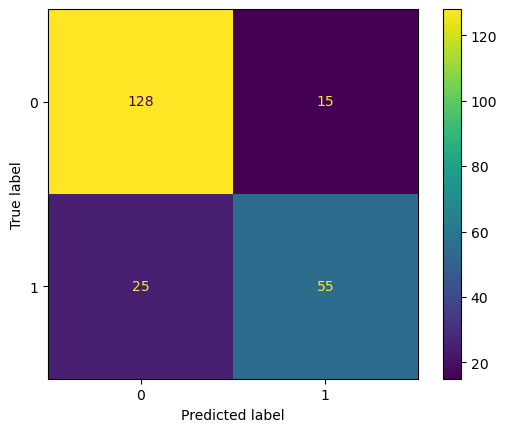

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cfd, X_test, y_test)
plt.show()

- Score

In [39]:
from sklearn.metrics import accuracy_score

In [58]:
score = accuracy_score(y_test, predictors)
score

0.820627802690583

### GRIDSEARCHCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parametros = {'C': [1.0, 1.5, 2.0],
             'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
             'tol': [0.001, 0.0001, 0.00001]}

In [43]:
grid_search = GridSearchCV(estimator= SVC(), param_grid = parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'kernel': 'rbf', 'tol': 0.001}
0.827154604230745


### VALIDAÇÃO CRUZADA

In [44]:
from sklearn.model_selection import cross_val_score, KFold

In [45]:
resultados = []
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    clf = SVC(C=1.0, kernel= 'rbf', tol= 0.001)
    scores = cross_val_score(clf, X, y, cv=kfold)
    resultados.append(scores.mean())

In [46]:
resultados
result = pd.DataFrame(data=resultados, columns=['Resultado'])

In [47]:
result

,Resultado
0,0.821561
1,0.818252
2,0.827216
3,0.830499
4,0.824844
5,0.822709
6,0.815930
7,0.823833
8,0.821610
9,0.826042


In [48]:
result.describe()

,Resultado
count,30.000000
mean,0.823453
std,0.003768
min,0.815930
25%,0.821532
50%,0.824338
75%,0.826017
max,0.830499


### GERANDO O CLASSIFICADOR FINAL

In [49]:
from sklearn.svm import SVC

In [50]:
clf = SVC(C=1.0, kernel= 'rbf', tol= 0.001, probability=True)
clf.fit(X, y)

SVC(probability=True)

In [51]:
import pickle
pickle.dump(clf, open('svm_finalizado.sav', 'wb'))

### CARREGANDO CLASSIFICADOR TREINADO

In [52]:
clfd = pickle.load(open('svm_finalizado.sav', 'rb'))

In [53]:
novo_registro = X[0]
novo_registro

array([ 0.82737724, -0.59799445,  0.43279337, -0.47367361, -0.50244517,
       -0.73769513,  0.73769513, -0.4838099 , -0.30756234,  0.61757214])

In [54]:
novo_registro = novo_registro.reshape(1, -1)

In [55]:
novo_registro

array([[ 0.82737724, -0.59799445,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513,  0.73769513, -0.4838099 , -0.30756234,  0.61757214]])

In [56]:
clfd.predict(novo_registro)

array([0], dtype=int64)